##data collection##

In [3]:
import requests
import pandas as pd
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'  # Replace with the actual URL of the data you want to fetch
response = requests.get(url)
if response.status_code==200:
  print("data fetched successfully")
else:
  print("failed to fetch data")


data fetched successfully


In [4]:
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##Data Preprocessing


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<Axes: >

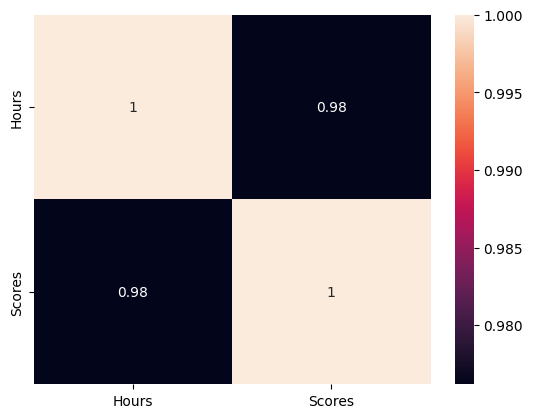

In [16]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [34]:
X=df.drop(columns=['Scores'],axis=1)
y=df.Hours
X


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


##Data Spliting

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state=10)

##Model training

In [39]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
model.predict(x_test)

,Hours
5,0.049383
1,0.493827
13,0.271605
2,0.259259
12,0.419753


In [40]:
model.predict([[9.25]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([76.025])